<a href="https://colab.research.google.com/github/sulimankhan587/Fake-news-detection/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
stopwords = set(STOPWORDS)

nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Read Excel File

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/up/talal/talal/task1/main_data_with_label.xlsx')
df

In [ ]:
# check how many row in the data
len(df)

237743

# Choose the Important Features
For this classification, we have to choose the important feature. For this case, we will use:
- id
- author_id
- source
- text
- label
- public_metrics

FYI "public_metrics" column still has JSON format. So we should separate it first become:
- retweet
- reply
- like
- quote

So, we can analyse them in depth.


In [ ]:
# Check
to = df['public_metrics'].to_list()
for i in range(5):
    print(''+str(i+1)+': '+to[i])

1: {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}
2: {'retweet_count': 4056, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}
3: {'retweet_count': 43, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}
4: {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}
5: {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}


In [ ]:
df_tweet = df[['id', 'author_id','public_metrics', 'source' ,'text', 'label']]
df_tweet

,id,author_id,public_metrics,source,text,label
0,1357411153000000000,1289288731000000000,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,Should there even be an All-Star Game this yea...,True
1,1357411153000000000,1275531383000000000,"{'retweet_count': 4056, 'reply_count': 0, 'lik...",Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True
2,1357411152000000000,4825557477,"{'retweet_count': 43, 'reply_count': 0, 'like_...",Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True
3,1357411152000000000,2866489102,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True
4,1357411152000000000,22970986,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True
...,...,...,...,...,...,...
237738,1356123683555687936,2816811781,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,@ADKHospital @HPA_MV @MoHmv Tony Robbins just ...,Fake
237739,1356111948665019904,958710380968034432,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,"@SkyNews Flu has been rebranded as COVID, the ...",Fake
237740,1356110942610857984,958710380968034432,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",Twitter Web App,"Flu has been rebranded as COVID, the PCR test ...",Fake
237741,1356103385640911104,1349537544610868992,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,Nearly a month on... and this ridiculously acc...,Fake


In [ ]:
#separate the "public_metrics" column in to retweet, reply, like and quote column. We should split it.
# This is the original column data => {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}
# We could separate it using split by comma.

df_tweet[['retweet', 'reply', 'like', 'quote']] = df_tweet['public_metrics'].str.split(',').apply(pd.Series)
df_tweet

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,author_id,public_metrics,source,text,label,retweet,reply,like,quote
0,1357411153000000000,1289288731000000000,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,Should there even be an All-Star Game this yea...,True,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}
1,1357411153000000000,1275531383000000000,"{'retweet_count': 4056, 'reply_count': 0, 'lik...",Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,{'retweet_count': 4056,'reply_count': 0,'like_count': 0,'quote_count': 0}
2,1357411152000000000,4825557477,"{'retweet_count': 43, 'reply_count': 0, 'like_...",Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,{'retweet_count': 43,'reply_count': 0,'like_count': 0,'quote_count': 0}
3,1357411152000000000,2866489102,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,{'retweet_count': 1,'reply_count': 0,'like_count': 0,'quote_count': 0}
4,1357411152000000000,22970986,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}
...,...,...,...,...,...,...,...,...,...,...
237738,1356123683555687936,2816811781,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,@ADKHospital @HPA_MV @MoHmv Tony Robbins just ...,Fake,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}
237739,1356111948665019904,958710380968034432,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,"@SkyNews Flu has been rebranded as COVID, the ...",Fake,{'retweet_count': 0,'reply_count': 0,'like_count': 4,'quote_count': 0}
237740,1356110942610857984,958710380968034432,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",Twitter Web App,"Flu has been rebranded as COVID, the PCR test ...",Fake,{'retweet_count': 1,'reply_count': 0,'like_count': 3,'quote_count': 0}
237741,1356103385640911104,1349537544610868992,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,Nearly a month on... and this ridiculously acc...,Fake,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}


In [ ]:
#After that, we can choosed the number only (digit) from the column.

df_tweet['retweet']= df_tweet['retweet'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
df_tweet['reply']= df_tweet['reply'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
df_tweet['like']= df_tweet['like'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
df_tweet['quote']= df_tweet['quote'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
df_tweet = df_tweet.drop(columns=['public_metrics'])
df_tweet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,id,author_id,source,text,label,retweet,reply,like,quote
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...
237738,1356123683555687936,2816811781,Twitter Web App,@ADKHospital @HPA_MV @MoHmv Tony Robbins just ...,Fake,0,0,0,0
237739,1356111948665019904,958710380968034432,Twitter Web App,"@SkyNews Flu has been rebranded as COVID, the ...",Fake,0,0,4,0
237740,1356110942610857984,958710380968034432,Twitter Web App,"Flu has been rebranded as COVID, the PCR test ...",Fake,1,0,3,0
237741,1356103385640911104,1349537544610868992,Twitter for iPhone,Nearly a month on... and this ridiculously acc...,Fake,0,0,0,0


In [ ]:
# Then, dont forget to change the data type of the column become integer.
# So, we can analyse it in EDA later

df_tweet['retweet']= df_tweet['retweet'].astype(int)
df_tweet['reply']= df_tweet['reply'].astype(int)
df_tweet['like']= df_tweet['like'].astype(int)
df_tweet['quote']= df_tweet['quote'].astype(int)
df_tweet.head(10)

,id,author_id,source,text,label,retweet,reply,like,quote
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0
5,1357411152000000000,1211482699000000000,Twitter for iPhone,This is considered a felony with Covid going o...,True,0,0,0,0
6,1357411151000000000,1891191457,Twitter Web App,@SteveLawrence_ You would say that but every v...,True,0,0,0,0
7,1357411151000000000,1293819643000000000,Twitter for iPhone,RT @tiwtter2345: #闫丽梦 \n#LimengYan \n\n#Covid1...,True,2,0,0,0
8,1357411151000000000,2578851859,Twitter for iPhone,RT @HelenaMorenoLA: Last year we didn’t know C...,True,1,0,0,0
9,1357411151000000000,103154813,Twitter for iPhone,RT @NoEmmeG: man we could roll out so many suc...,True,23,0,0,0


# Explanatory Data Analysis

## Comparison Fake/ True News Label


In [ ]:
temp = df_tweet.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,text
1,True,179681
0,Fake,58062


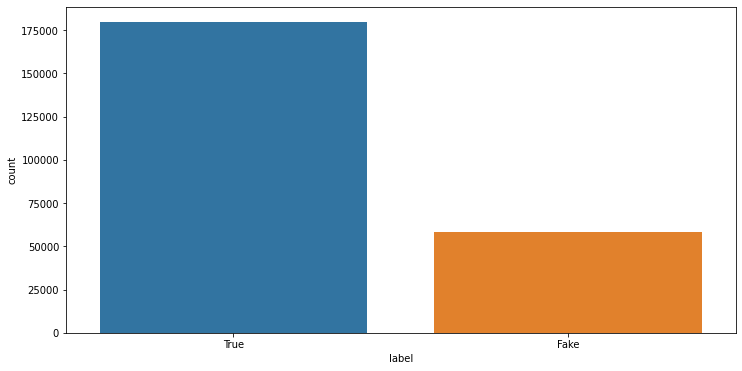

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=df_tweet)

In [ ]:
t = df_tweet["text"].to_list()
for i in range(5):
    print('Tweet Number '+str(i+1)+': '+t[i])

Tweet Number 1: Should there even be an All-Star Game this year? 🤷🏽‍♂️
-The dunk, and three point contests in an empty gym....
-Playing an exhibition game that bares no affect on the outcome of the season....
-If there is a covid case, the best players would be out on protocols
Tweet Number 2: RT @narendramodi: Spoke to President @CyrilRamaphosa about the measures India and South Africa are taking to fight the COVID-19 pandemic do…
Tweet Number 3: RT @TorontoStar: How risky are Ontario schools for COVID-19 transmission? A Star analysis of population-adjusted infection rates over the l…
Tweet Number 4: RT @dankennedy_nu: Now up at @storybench: How our @NUjournalism students reported on candidates’ views regarding the legislative exemption…
Tweet Number 5: 'Don't treat this lightly': Coronavirus survivors discuss experience with reinfection https://t.co/09FlD7EOz0


## Length of Tweet

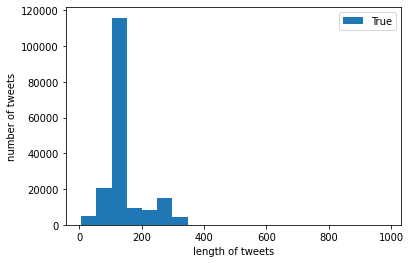

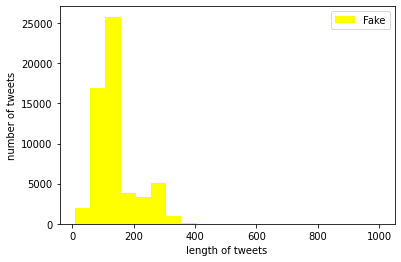

In [ ]:
plt.hist(df_tweet[df_tweet['label']=='True'].text.str.len(),bins=20,label='True')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df_tweet[df_tweet['label']=='Fake'].text.str.len(),color='yellow',bins=20,label='Fake')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

## Top 10 Retweet by Author


In [ ]:
#Sort by the retweet data

df_tweet_ret = df_tweet[["author_id", "retweet"]]
df_tweet_ret = df_tweet_ret.sort_values("retweet", ascending=False).head(10)
print(df_tweet_ret)

                  author_id  retweet
44746   1337318637000000000   236515
10650             106163059   236513
72595   1244744532000000000   236512
55817   1325939681000000000   236510
61773   1008771087000000000   236510
105510  1041050714000000000   236509
3105             2680526305   172144
10089              47648122   168742
101108           2857771671   133119
103432            126784624   133119


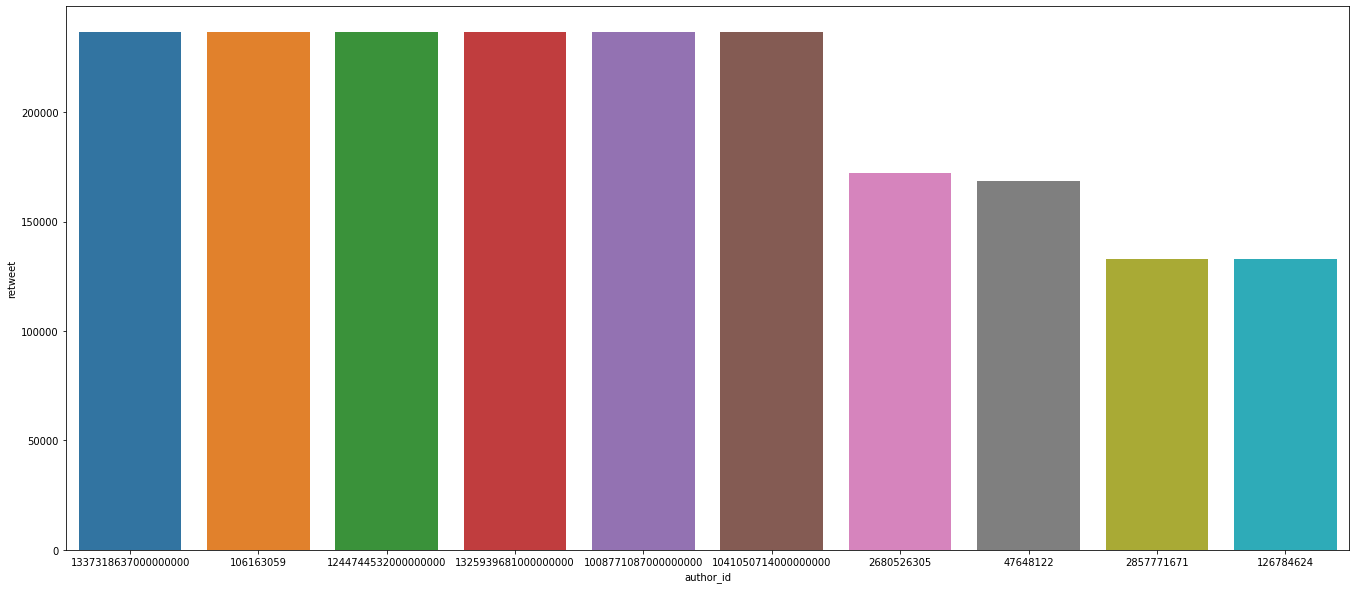

In [ ]:
plt.figure(figsize=(23,10))
sns.barplot(x='author_id', y="retweet", data=df_tweet_ret,
            order=df_tweet_ret.sort_values('retweet',ascending = False).author_id)

## Top 10 Reply by Author

In [ ]:
#Sort by the reply based on the author

df_tweet_rep = df_tweet[["author_id", "reply"]]
df_tweet_rep = df_tweet_rep.sort_values("reply", ascending=False).head(10)
print(df_tweet_rep)

                  author_id  reply
135692            204444440   1369
109091  1224185690713460992    372
175041  1351205070973652992    327
84324              15745368    313
24016              61183568    308
20364             197496309    293
219746             21651982    290
129359  1302327979595496960    230
164373             60886384    219
101523             19825835    207


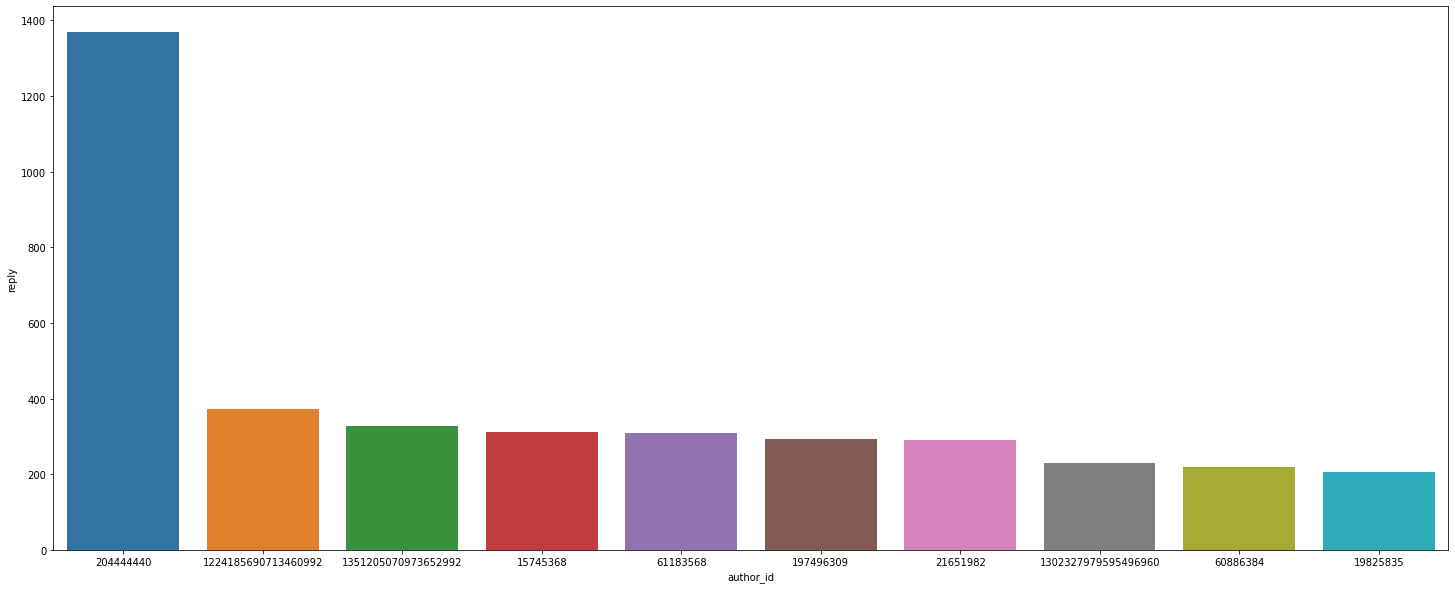

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x='author_id', y="reply", data=df_tweet_rep,
            order=df_tweet_rep.sort_values('reply',ascending = False).author_id)

## Top 10 Likes by Author

In [ ]:
# sort the likes data by the author

df_tweet_like = df_tweet[["author_id", "like"]]
df_tweet_like = df_tweet_like.sort_values("like", ascending=False).head(10)
print(df_tweet_like)

                  author_id   like
135692            204444440  10409
219746             21651982   7760
152234             57441414   4813
164373             60886384   4669
144105  1312605334075305984   4126
129289             21651982   3671
130174  1345043965846949888   3557
147778            144580542   3467
110247             21651982   3357
114688             21651982   3204


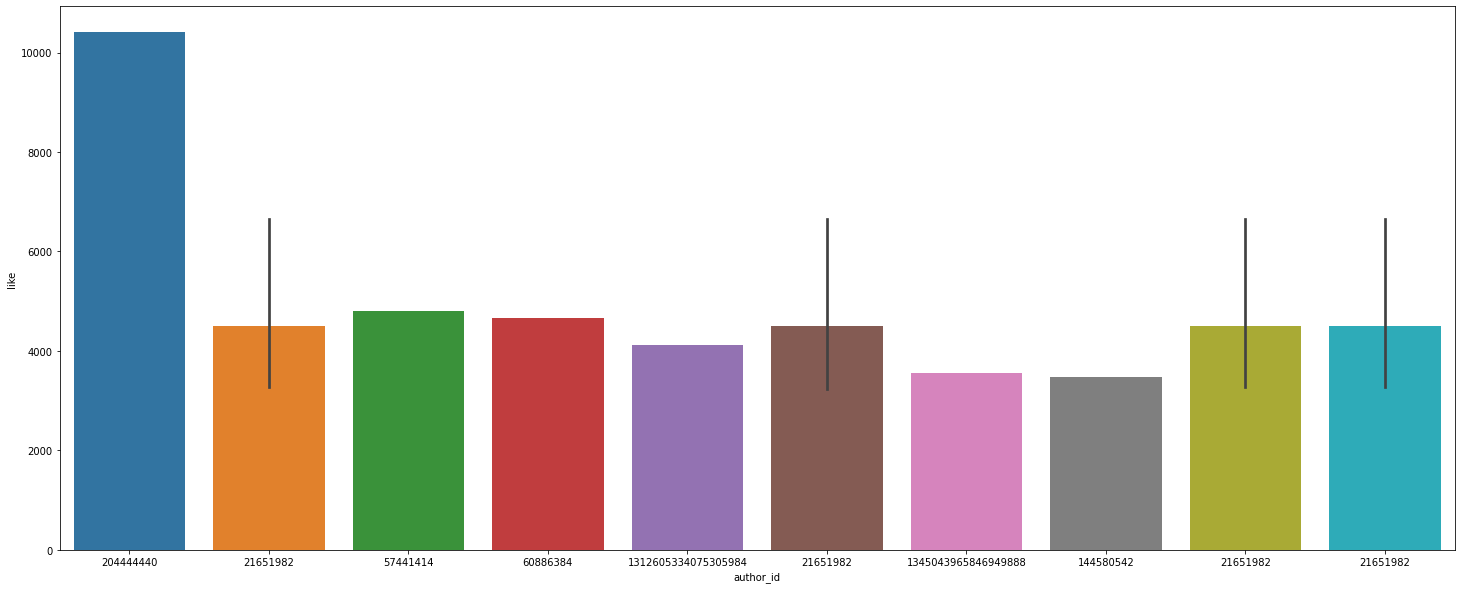

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x='author_id', y="like", data=df_tweet_like,
            order=df_tweet_like.sort_values('like', ascending=False).author_id)

## Tweet Text Source Graph

In [ ]:
df_tweet['source'].value_counts().head(n=10)

Twitter for iPhone     37034
Twitter Web App        28363
Twitter for Android    26992
Twitter for iPad        4039
TweetDeck               1911
Hootsuite Inc.          1095
dlvr.it                  654
WordPress.com            625
SocialFlow               547
Buffer                   372
Name: source, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


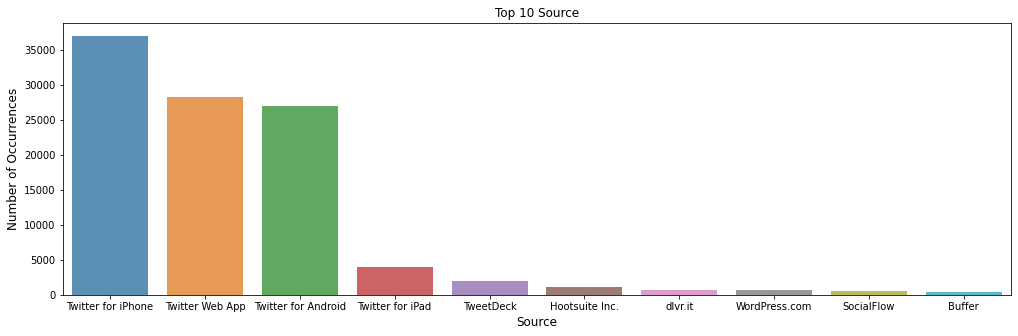

In [ ]:
sourcess  = df_tweet['source'].value_counts()
sourcess = sourcess[:10,]
plt.figure(figsize=(17,5))
sns.barplot(sourcess.index, sourcess.values, alpha=0.8)
plt.title('Top 10 Source')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.show()

## Mention Wordcloud

We can extract the Twitter Mention from the Tweets. We can use findall and Regex function for handling on it.

- `@.*?` carries out a non-greedy match for a word starting with a mention
- `(?=\s|$)`  look-ahead for the end of the word or end of the sentence
- `(?:(?<=\s)|(?<=^))` look-behind to ensure there are no false positives if a @ is used in the middle of a word

In [ ]:

df_tweet['mention'] = df_tweet['text'].apply(lambda x: re.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)', x))
df_tweet.head(5)

,id,author_id,source,text,label,retweet,reply,like,quote,mention
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0,[]
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0,"[@narendramodi:, @CyrilRamaphosa]"
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0,[@TorontoStar:]
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0,"[@dankennedy_nu:, @storybench:, @NUjournalism]"
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0,[]


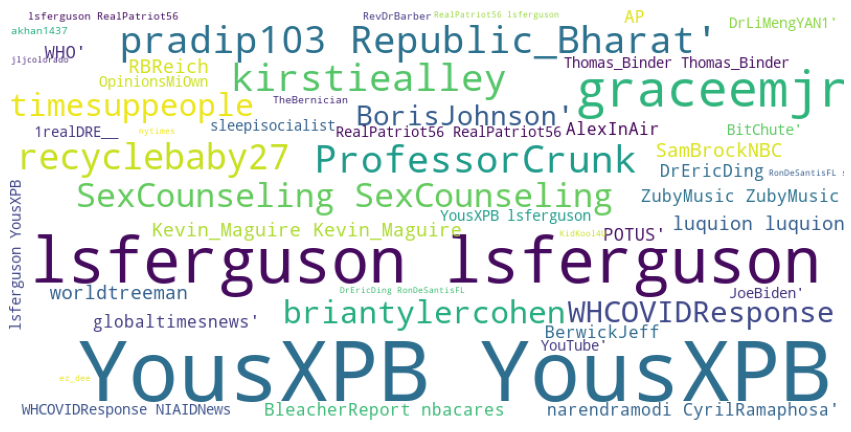

In [ ]:
# Then we can make the wordcloub based on the account mention.

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data_mention, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=2,
        random_state=5
).generate(str(data_mention))

    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(' '.join([str(text) for text in df_tweet['mention']]))

### Mention in True News

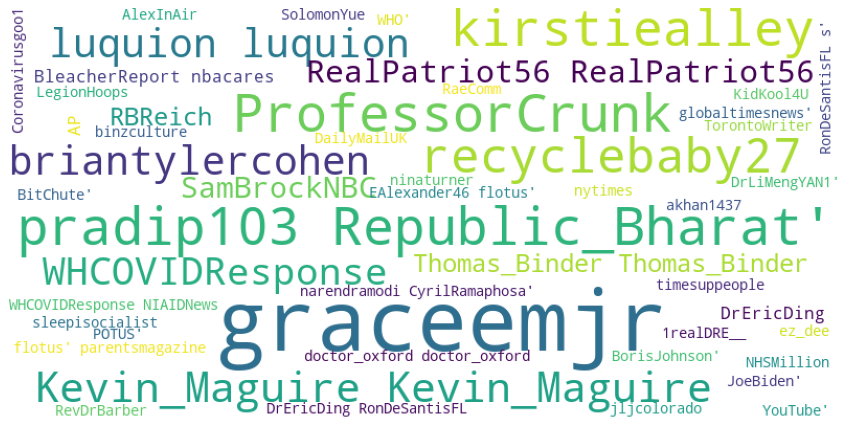

In [ ]:
true_words_mention =' '.join([str(text) for text in df_tweet['mention'][df_tweet['label'] == 'True']])

wordcloud(true_words_mention)

### Mention in Fake News

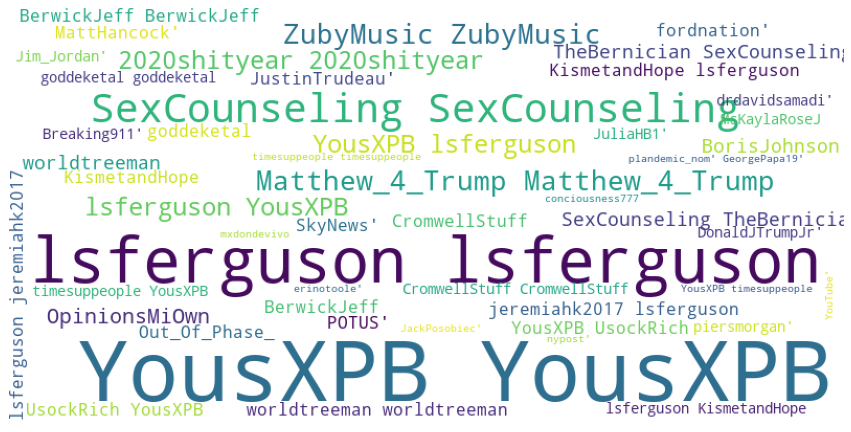

In [ ]:
fake_mention =' '.join([str(text) for text in df_tweet['mention'][df_tweet['label'] == 'Fake']])

wordcloud(fake_mention)

## Hastagh Wordcloud

In [ ]:
#We can extract the Twitter Mention from the Tweets. We can use findall and Regex function for handling on it.
#- `#(\w+)` carries out a non-greedy match for a word starting with a hashtag

df_tweet['hashtag'] = df_tweet['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_tweet.head(10)

,id,author_id,source,text,label,retweet,reply,like,quote,mention,hashtag
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0,[],[]
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0,"[@narendramodi:, @CyrilRamaphosa]",[]
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0,[@TorontoStar:],[]
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0,"[@dankennedy_nu:, @storybench:, @NUjournalism]",[]
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0,[],[]
5,1357411152000000000,1211482699000000000,Twitter for iPhone,This is considered a felony with Covid going o...,True,0,0,0,0,[],[]
6,1357411151000000000,1891191457,Twitter Web App,@SteveLawrence_ You would say that but every v...,True,0,0,0,0,[@SteveLawrence_],[]
7,1357411151000000000,1293819643000000000,Twitter for iPhone,RT @tiwtter2345: #闫丽梦 \n#LimengYan \n\n#Covid1...,True,2,0,0,0,[@tiwtter2345:],"[闫丽梦, LimengYan, Covid19, CCPVirus, Hydroxychl..."
8,1357411151000000000,2578851859,Twitter for iPhone,RT @HelenaMorenoLA: Last year we didn’t know C...,True,1,0,0,0,[@HelenaMorenoLA:],[NOLA]
9,1357411151000000000,103154813,Twitter for iPhone,RT @NoEmmeG: man we could roll out so many suc...,True,23,0,0,0,[@NoEmmeG:],[]


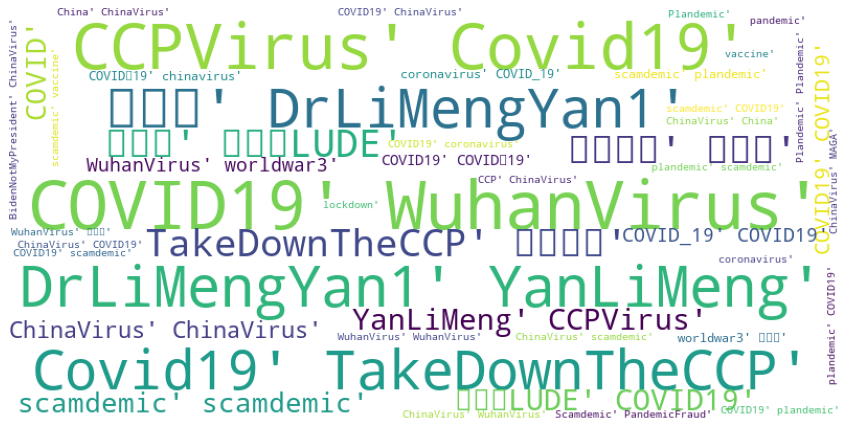

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data_mention, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=80,
        max_font_size=40,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data_mention))

    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(' '.join([str(text) for text in df_tweet['hashtag']]))

### Hashtag in True News


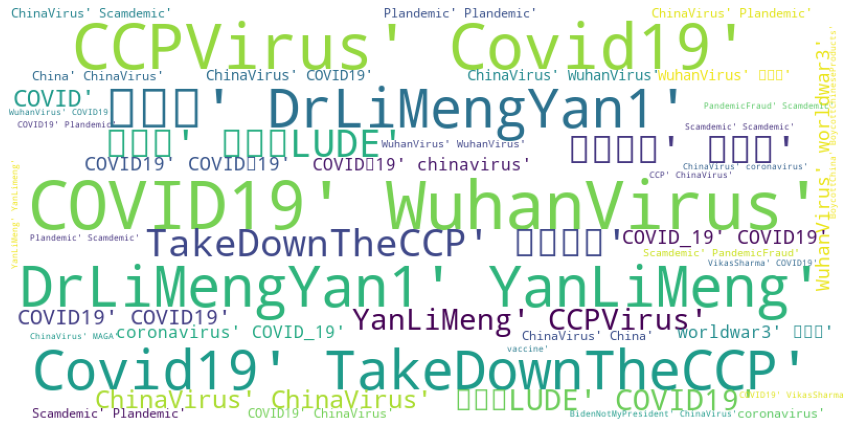

In [ ]:
true_words_has =' '.join([str(text) for text in df_tweet['hashtag'][df_tweet['label'] == 'True']])

wordcloud(true_words_has)

### Hastgah in Fake News

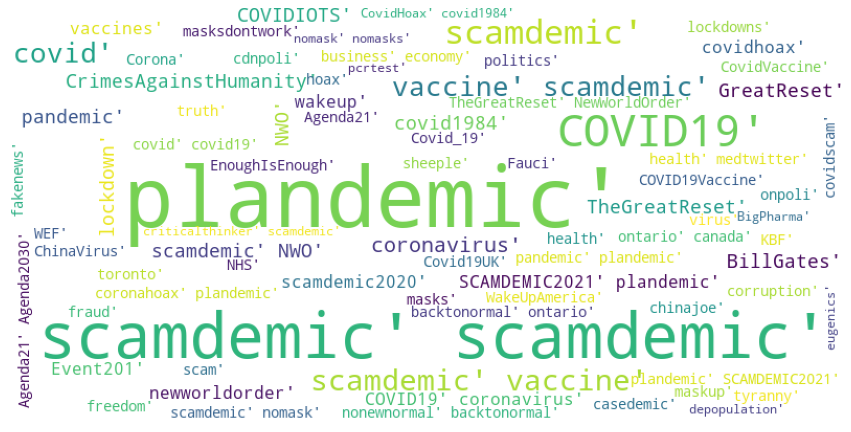

In [ ]:
fake_words_has =' '.join([str(text) for text in df_tweet['hashtag'][df_tweet['label'] == 'Fake']])

wordcloud(fake_words_has)

# Preprocessing

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('popular')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |

True

### Cleaning Tweets

In [ ]:
import re

def cleaning(sent):
    # change become lower
    string = sent.lower()
    # remove retweet
    string = re.sub(r'rt', '', string)
    # remove link website
    string = re.sub(r'http\S+', '', string)
    # remove mention (@symbol)
    string = re.sub('@[^\s]+', '', string)
    # remove hastagh
    string = re.sub(r'#([^\s]+)', '', string)
    # remove punctuation
    string = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", string)
    string = re.sub(r'[^\x00-\x7f]', r'', string)
    string = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', string)
    string = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", string)
    string = re.sub(r'\\u\w\w\w\w', '', string)
    return string

df_tweet['text_clean'] = df_tweet['text'].apply(cleaning)
df_tweet

,id,author_id,source,text,label,retweet,reply,like,quote,mention,hashtag,text_clean
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0,[],[],should there even be an all star game this yea...
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0,"[@narendramodi:, @CyrilRamaphosa]",[],spoke to president about the measures india...
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0,[@TorontoStar:],[],how risky are ontario schools for covid t...
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0,"[@dankennedy_nu:, @storybench:, @NUjournalism]",[],now up at how our students repoed on candi...
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0,[],[],don t treat this lightly coronavirus surviv...
...,...,...,...,...,...,...,...,...,...,...,...,...
237738,1356123683555687936,2816811781,Twitter Web App,@ADKHospital @HPA_MV @MoHmv Tony Robbins just ...,Fake,0,0,0,0,"[@ADKHospital, @HPA_MV, @MoHmv]",[],tony robbins just called out the scamdemic ...
237739,1356111948665019904,958710380968034432,Twitter Web App,"@SkyNews Flu has been rebranded as COVID, the ...",Fake,0,0,4,0,[@SkyNews],[],flu has been rebranded as covid the pcr test...
237740,1356110942610857984,958710380968034432,Twitter Web App,"Flu has been rebranded as COVID, the PCR test ...",Fake,1,0,3,0,[],[],flu has been rebranded as covid the pcr test ...
237741,1356103385640911104,1349537544610868992,Twitter for iPhone,Nearly a month on... and this ridiculously acc...,Fake,0,0,0,0,[],"[novid19, plandemic, covid, covid19, vaccine, ...",nearly a month on and this ridiculously acc...


In [ ]:
#check the text_clean
tc = df_tweet["text_clean"].to_list()
for i in range(3):
    print('Tweet Number '+str(i+1)+': '+tc[i])

Tweet Number 1: should there even be an all star game this year    the dunk  and three point contests in an empty gym      playing an exhibition game that bares no affect on the outcome of the season      if there is a covid case  the best players would be out on protocols
Tweet Number 2:   spoke to president  about the measures india and south africa are taking to fight the covid    pandemic do
Tweet Number 3:   how risky are ontario schools for covid    transmission  a star analysis of population adjusted infection rates over the l


In [ ]:
#remove short words (ex: be, a, as, etc)
df_tweet['text_clean'] = df_tweet['text_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_tweet

,id,author_id,source,text,label,retweet,reply,like,quote,mention,hashtag,text_clean
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0,[],[],should there even star game this year dunk thr...
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0,"[@narendramodi:, @CyrilRamaphosa]",[],spoke president about measures india south afr...
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0,[@TorontoStar:],[],risky ontario schools covid transmission star ...
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0,"[@dankennedy_nu:, @storybench:, @NUjournalism]",[],students repoed candidates views regarding leg...
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0,[],[],treat this lightly coronavirus survivors discu...
...,...,...,...,...,...,...,...,...,...,...,...,...
237738,1356123683555687936,2816811781,Twitter Web App,@ADKHospital @HPA_MV @MoHmv Tony Robbins just ...,Fake,0,0,0,0,"[@ADKHospital, @HPA_MV, @MoHmv]",[],tony robbins just called scamdemic hypocrisy d...
237739,1356111948665019904,958710380968034432,Twitter Web App,"@SkyNews Flu has been rebranded as COVID, the ...",Fake,0,0,4,0,[@SkyNews],[],been rebranded covid test over revved produce ...
237740,1356110942610857984,958710380968034432,Twitter Web App,"Flu has been rebranded as COVID, the PCR test ...",Fake,1,0,3,0,[],[],been rebranded covid test over revved produce ...
237741,1356103385640911104,1349537544610868992,Twitter for iPhone,Nearly a month on... and this ridiculously acc...,Fake,0,0,0,0,[],"[novid19, plandemic, covid, covid19, vaccine, ...",nearly month this ridiculously accurate spoof ...


### Stopwords

In [ ]:
#stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

tokenized_tweet1 = df_tweet['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tokenized_tweet1

0         even star game year dunk three point contests ...
1         spoke president measures india south africa ta...
2         risky ontario schools covid transmission star ...
3         students repoed candidates views regarding leg...
4         treat lightly coronavirus survivors discuss ex...
                                ...                        
237738    tony robbins called scamdemic hypocrisy died a...
237739    rebranded covid test revved produce scary figu...
237740    rebranded covid test revved produce scary figu...
237741    nearly month ridiculously accurate spoof piece...
237742    vaccines normally take decades research develo...
Name: text_clean, Length: 237743, dtype: object

In [ ]:
#tokenization
from nltk.tokenize import word_tokenize

tokenized_tweet = tokenized_tweet1.apply(word_tokenize)
tokenized_tweet

0         [even, star, game, year, dunk, three, point, c...
1         [spoke, president, measures, india, south, afr...
2         [risky, ontario, schools, covid, transmission,...
3         [students, repoed, candidates, views, regardin...
4         [treat, lightly, coronavirus, survivors, discu...
                                ...                        
237738    [tony, robbins, called, scamdemic, hypocrisy, ...
237739    [rebranded, covid, test, revved, produce, scar...
237740    [rebranded, covid, test, revved, produce, scar...
237741    [nearly, month, ridiculously, accurate, spoof,...
237742    [vaccines, normally, take, decades, research, ...
Name: text_clean, Length: 237743, dtype: object

In [ ]:
# #stemming
# from nltk.stem.porter import *
# stemmer = PorterStemmer()
# tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
# tokenized_tweet

## Wordcloud

In [ ]:

df_tweet['text_clean_new']= tokenized_tweet1
df_tweet['text_clean_token']=tokenized_tweet

In [ ]:
df_tweet

,id,author_id,source,text,label,retweet,reply,like,quote,mention,hashtag,text_clean,text_clean_new,text_clean_token
0,1357411153000000000,1289288731000000000,Twitter for Android,Should there even be an All-Star Game this yea...,True,0,0,0,0,[],[],should there even star game this year dunk thr...,even star game year dunk three point contests ...,"[even, star, game, year, dunk, three, point, c..."
1,1357411153000000000,1275531383000000000,Twitter for Android,RT @narendramodi: Spoke to President @CyrilRam...,True,4056,0,0,0,"[@narendramodi:, @CyrilRamaphosa]",[],spoke president about measures india south afr...,spoke president measures india south africa ta...,"[spoke, president, measures, india, south, afr..."
2,1357411152000000000,4825557477,Twitter for iPhone,RT @TorontoStar: How risky are Ontario schools...,True,43,0,0,0,[@TorontoStar:],[],risky ontario schools covid transmission star ...,risky ontario schools covid transmission star ...,"[risky, ontario, schools, covid, transmission,..."
3,1357411152000000000,2866489102,Twitter Web App,RT @dankennedy_nu: Now up at @storybench: How ...,True,1,0,0,0,"[@dankennedy_nu:, @storybench:, @NUjournalism]",[],students repoed candidates views regarding leg...,students repoed candidates views regarding leg...,"[students, repoed, candidates, views, regardin..."
4,1357411152000000000,22970986,SocialNewsDesk,'Don't treat this lightly': Coronavirus surviv...,True,0,0,0,0,[],[],treat this lightly coronavirus survivors discu...,treat lightly coronavirus survivors discuss ex...,"[treat, lightly, coronavirus, survivors, discu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237738,1356123683555687936,2816811781,Twitter Web App,@ADKHospital @HPA_MV @MoHmv Tony Robbins just ...,Fake,0,0,0,0,"[@ADKHospital, @HPA_MV, @MoHmv]",[],tony robbins just called scamdemic hypocrisy d...,tony robbins called scamdemic hypocrisy died a...,"[tony, robbins, called, scamdemic, hypocrisy, ..."
237739,1356111948665019904,958710380968034432,Twitter Web App,"@SkyNews Flu has been rebranded as COVID, the ...",Fake,0,0,4,0,[@SkyNews],[],been rebranded covid test over revved produce ...,rebranded covid test revved produce scary figu...,"[rebranded, covid, test, revved, produce, scar..."
237740,1356110942610857984,958710380968034432,Twitter Web App,"Flu has been rebranded as COVID, the PCR test ...",Fake,1,0,3,0,[],[],been rebranded covid test over revved produce ...,rebranded covid test revved produce scary figu...,"[rebranded, covid, test, revved, produce, scar..."
237741,1356103385640911104,1349537544610868992,Twitter for iPhone,Nearly a month on... and this ridiculously acc...,Fake,0,0,0,0,[],"[novid19, plandemic, covid, covid19, vaccine, ...",nearly month this ridiculously accurate spoof ...,nearly month ridiculously accurate spoof piece...,"[nearly, month, ridiculously, accurate, spoof,..."


In [ ]:
# df_tweet.to_csv('/content/drive/MyDrive/up/talal/talal/task1/Finalnew.csv', index=False)

#### All of data

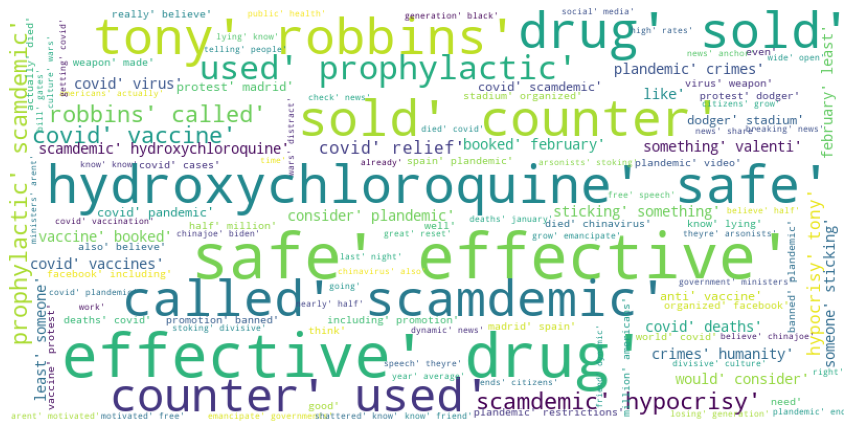

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(' '.join([str(text) for text in df_tweet['text_clean_token']]))

#### True Label

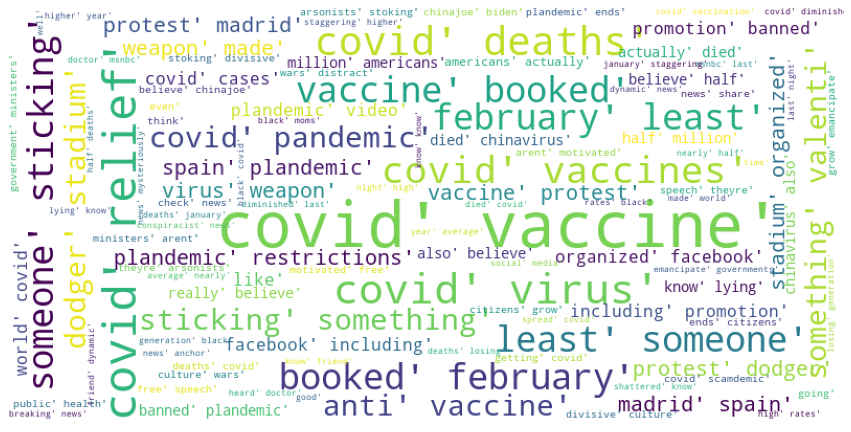

In [ ]:
true_words =' '.join([str(text) for text in df_tweet['text_clean_token'][df_tweet['label'] == 'True']])

wordcloud(true_words)

#### Fake Label

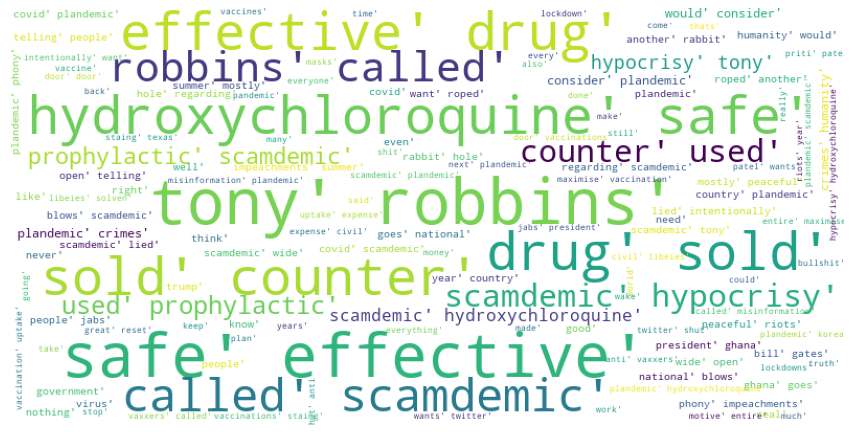

In [ ]:
true_words =' '.join([str(text) for text in df_tweet['text_clean_token'][df_tweet['label'] == 'Fake']])

wordcloud(true_words)

# Split cleaning Data to Train dan Validation Data

In [ ]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Change from dataframe to array

tokenized_tweet_str = []
for i in range(len(tokenized_tweet)):
    tokenized_tweet_str.append(' '.join(tokenized_tweet[i]))
df_tweet['text_clean_new_str'] = tokenized_tweet_str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_tweet['text_clean_new_str']

0         even star game year dunk three point contests ...
1         spoke president measures india south africa ta...
2         risky ontario schools covid transmission star ...
3         students repoed candidates views regarding leg...
4         treat lightly coronavirus survivors discuss ex...
                                ...                        
237738    tony robbins called scamdemic hypocrisy died a...
237739    rebranded covid test revved produce scary figu...
237740    rebranded covid test revved produce scary figu...
237741    nearly month ridiculously accurate spoof piece...
237742    vaccines normally take decades research develo...
Name: text_clean_new_str, Length: 237743, dtype: object

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df_tweet['text_clean_new_str'], df_tweet['label'], test_size=0.2, random_state=42, stratify=df_tweet['label'])
y_train = np.array(y_train)
y_valid = np.array(y_valid)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((190194,), (47549,), (190194,), (47549,))

# Feature Extracton

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Use PCA for feature decomposition.
def pca_decomposition(train_data, valid_data) :
  pca = PCA(n_components=5)
  train_data_pca = pca.fit_transform(train_data)
  valid_data_pca = pca.transform(valid_data)

  return train_data_pca, valid_data_pca

In [ ]:

def scaling(train_data, valid_data) :
  scaler = StandardScaler()
  train_data_scaled = scaler.fit_transform(train_data)
  valid_data_scaled = scaler.transform(valid_data)

  return train_data_scaled, valid_data_scaled

In [ ]:

def scaling_min_max(train_data, valid_data) :
  scaler = MinMaxScaler()
  train_data_scaled = scaler.fit_transform(train_data)
  valid_data_scaled = scaler.transform(valid_data)

  return train_data_scaled, valid_data_scaled

In [ ]:
class Word2Vec(BaseEstimator,TransformerMixin):
    def __init__(self,size=100):
        self.size = size

    def execute(self,X,y=None):
        model_w2v_train = gensim.models.Word2Vec(size=self.size, window=5, min_count=1, workers=4, seed=42)
        documents_train = [text.split() for text in X]
        print(documents_train)

        model_w2v_train.build_vocab(documents_train)
        model_w2v_train.train(documents_train,total_examples=len(documents_train),epochs=10)

        vector_train=[]
        from tqdm import tqdm
        for sent in tqdm(documents_train):
          sent_vec=np.zeros(self.size)
          count =0
          for word in sent:
            if word in list(model_w2v_train.wv.vocab):
              vec = model_w2v_train.wv[word]
              sent_vec += vec
              count += 1
          if count != 0:
            sent_vec /= count #normalize
          vector_train.append(sent_vec)

        return vector_train

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return self.execute(X)

## BoW + TF-idf

In [ ]:
def bow_tfidf_encoding(train_data, valid_data) :
  bow = CountVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english')
  tfidf = TfidfVectorizer(max_features=500, stop_words='english')

  union = FeatureUnion([("bow", bow ), ("tfidf", tfidf)])

  train_transform = union.fit_transform(train_data)
  train_df = pd.DataFrame.sparse.from_spmatrix(train_transform)

  valid_transform = union.fit_transform(valid_data)
  valid_df = pd.DataFrame.sparse.from_spmatrix(valid_transform)

  return train_df, valid_df

In [ ]:
X_train_bt , X_valid_bt = bow_tfidf_encoding(X_train,X_valid)


In [ ]:
X_train_bt_pca , X_valid_bt_pca = pca_decomposition(X_train_bt, X_valid_bt)
X_train_bt_scaling_standard , X_valid_bt_scaling_standard = scaling(X_train_bt_pca, X_valid_bt_pca)
X_train_bt_scaling_min_max , X_valid_bt_scaling_min_max = scaling_min_max(X_train_bt_pca, X_valid_bt_pca)

## BoW + Word2Vec

In [ ]:
def bow_w2v_encoding(train_data, valid_data) :
  bow = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
  w2v = Word2Vec(size=100)

  union = FeatureUnion([("bow", bow ), ("w2v", w2v)])

  train_transform = union.fit_transform(train_data)
  train_df = pd.DataFrame.sparse.from_spmatrix(train_transform)

  valid_transform = union.fit_transform(valid_data)
  valid_df = pd.DataFrame.sparse.from_spmatrix(valid_transform)

  return train_df, valid_df

In [ ]:
X_train_bw , X_valid_bw = bow_w2v_encoding(X_train,X_valid)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 190194/190194 [37:48<00:00, 83.86it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 47549/47549 [04:28<00:00, 177.15it/s]


In [ ]:
X_train_bw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.722993,-0.194419,0.367612,-0.555445,-0.266529,0.176721,0.134399,1.441216,-0.447716,0.492980,-0.614608,-0.235140,0.832081,1.448320,-0.238726,0.097664,0.155776,0.308949,0.914628,-0.480735,0.791250,0.422475,0.172908,-0.153847,-0.370631,0.899458,0.656888,-0.764107,-0.234639,0.858960,-0.805570,-0.809346,0.996284,-0.073391,0.822790,-1.225078,-0.255896,-0.154861,0.160944,-0.167121
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.423169,0.260461,-0.364582,0.071154,-0.468041,0.255863,0.086705,0.522033,0.338173,-0.109039,-0.116916,-0.682030,-0.379241,0.777605,-0.180080,0.095503,-0.575529,0.348201,-0.122590,0.448392,0.336250,-0.242652,0.791702,0.261452,-0.196713,0.193849,-0.230377,-0.684938,-0.612665,0.535915,0.515435,-0.053029,0.335173,0.240654,-0.657846,0.091454,-0.317615,0.696830,-0.291621,-0.452358
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.334456,0.799504,-0.558257,-0.845744,0.634311,-0.198118,-1.322580,0.095005,-0.075085,0.508633,0.035269,-0.697210,0.277483,0.406198,1.281959,0.645768,0.483843,-0.664484,0.269281,0.335708,-0.669893,0.812017,0.871846,0.530393,-0.082060,-0.600857,0.088307,-0.926267,0.197112,1.359714,-0.038932,-0.354203,-0.826057,0.428120,-1.374207,0.624106,-1.159245,1.571799,-0.547131,0.841588
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.814982,0.858724,-0.730292,-0.052276,0.614460,-0.235128,0.225400,1.080478,-0.083009,-0.091468,-0.479068,-1.025604,-0.096720,-0.009626,0.046778,0.713259,1.004328,0.223478,-0.145600,0.585816,0.234178,0.189387,0.332673,0.082956,0.449985,-0.626367,-0.010931,-0.151078,0.019337,0.980002,0.330014,-0.215911,-0.101329,-0.405302,-0.741322,-0.445660,-0.304549,-0.539141,-0.449293,0.436789
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.355648,0.366604,-0.197654,1.353763,-0.392351,0.728547,0.404393,0.522262,0.435201,1.695843,0.827002,0.903135,-1.375860,-0.584392,0.314734,-0.421097,0.719732,-0.954947,-1.072611,-0.836261,0.304573,0.518157,0.442462,0.318827,-0.351670,0.822372,0.810983,-1.066138,0.747128,1.463208,-0.147364,-0.108603,1.467110,0.744540,-0.798366,1.026852,-1.297976,-0.320568,-0.092966,1.200803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.844909,1.207226,-0.077380,-0.378903,0.432948,-0.035946,0.139435,1.224707,0.668304,-0.061009,0.579145,-0.139106,1.168650,0.994128,0.382788,-0.617259,0.515842,-1.062213,0.322714,-0.332912,0.964886,-0.299020,0.610556,-0.215179,-1.022812,0.103749,0.430206,-0.622326,-0.375218,0.304668,0.136926,-0.415958,1.356157,0.236553,-0.361993,-0.006617,-0.618322,1.017342,-0.610431,-0.655886
190190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
X_train_bw_pca , X_valid_bw_pca = pca_decomposition(X_train_bw, X_valid_bw)
X_train_bw_scaling_standard , X_valid_bw_scaling_standard = scaling(X_train_bw_pca, X_valid_bw_pca)
X_train_bw_scaling_min_max , X_valid_bw_scaling_min_max = scaling_min_max(X_train_bw_pca, X_valid_bw_pca)

## TF-idf + Word2Vec

In [ ]:
def tfidf_w2v_encoding(train_data, valid_data) :
  tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
  w2v = Word2Vec(size=100)

  union = FeatureUnion([("tfidf", tfidf ), ("w2v", w2v)])

  train_transform = union.fit_transform(train_data)
  train_df = pd.DataFrame.sparse.from_spmatrix(train_transform)

  valid_transform = union.fit_transform(valid_data)
  valid_df = pd.DataFrame.sparse.from_spmatrix(valid_transform)

  return train_df, valid_df

In [ ]:
X_train_tw , X_valid_tw = tfidf_w2v_encoding(X_train,X_valid)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 190194/190194 [43:57<00:00, 72.11it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 47549/47549 [04:54<00:00, 161.48it/s]


In [ ]:
X_train_tw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.788952,-0.397763,0.544742,-0.707379,0.028033,-0.291920,0.773228,1.142403,-0.859876,0.288734,-0.422058,-0.192980,0.646714,1.181732,0.101148,-0.324248,0.044115,0.493086,0.818850,-0.420553,0.603539,-0.045778,0.518558,-0.044754,-0.466458,0.918855,0.373740,-0.113650,-0.380930,0.405280,-0.889969,-0.708389,0.652540,-0.327935,0.336614,-1.433755,0.093856,0.512761,0.073860,-0.057435
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.579480,0.360295,-0.191699,0.260200,-0.077500,0.279492,0.181175,0.561898,-0.003267,-0.116437,-0.278648,-0.230841,-0.391044,0.936284,0.076513,-0.018600,-0.702626,0.358062,0.006002,0.204748,0.155060,-0.294915,0.680761,-0.030688,-0.385290,0.279635,-0.357654,-0.685067,-0.236428,0.419237,-0.000579,-0.070720,0.144674,0.172074,-0.635675,0.303401,-0.093075,0.595455,-0.343250,-0.515411
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.087682,0.148794,-0.760960,-0.222902,0.948103,-0.227718,-0.540419,0.130335,-0.331546,-0.031267,-0.443523,-1.000848,0.343877,0.553204,1.364003,-0.143712,0.548186,-0.797306,-0.072925,0.262568,-1.094506,0.393608,1.314087,0.405311,0.138722,-0.557240,0.221034,-1.090315,-0.474902,1.342048,-0.781501,-0.428232,-1.116519,0.508408,-1.088439,0.865030,-1.053569,1.855518,-0.589903,0.094295
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.784087,0.761479,-0.751889,-0.245468,0.379041,-0.030805,0.273207,0.995401,-0.001131,-0.224514,-0.403874,-0.811942,0.133807,0.338522,0.104543,0.502582,0.475913,-0.064824,-0.209526,0.856838,-0.042936,0.299463,0.297148,-0.000222,0.987301,-1.036918,0.193724,-0.147699,-0.497313,0.929416,0.128316,-0.581855,-0.256983,-0.362171,-0.618530,-0.708211,-0.855022,-0.351091,-0.423913,0.082828
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.452789,0.0,0.0,0.0,0.0,0.0,...,0.122031,0.069131,0.475555,0.771278,-0.469284,0.792017,0.226543,0.836136,0.989256,1.171637,0.816144,0.684797,-0.973805,0.018922,0.450839,-0.576527,0.285705,-0.717804,-1.399965,-0.745123,0.340263,0.754787,0.593496,0.187431,-0.180030,0.723827,0.416489,-1.101424,0.502395,1.141405,0.204066,-0.428114,1.026831,0.559884,-0.729399,0.900247,-1.872407,0.061299,0.052527,1.171409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.002103,1.101610,-0.583603,-0.330885,0.516927,-0.079255,0.616755,1.407592,0.079479,-0.126279,0.164136,-0.136962,1.091128,0.133482,0.850216,-1.237846,0.471629,-0.738475,0.162508,-0.536005,0.805617,-0.524734,0.074189,-0.300292,-0.542446,0.034372,0.796000,-0.454475,-0.671555,0.323014,-0.027534,-0.426415,1.102398,0.096746,-0.002332,-0.150062,-0.576792,0.848972,-0.621418,-1.138245
190190,0.0,0.0,0.0,0.0

In [ ]:
X_train_tw_pca , X_valid_tw_pca = pca_decomposition(X_train_tw, X_valid_tw)
X_train_tw_scaling_standard , X_valid_tw_scaling_standard = scaling(X_train_tw_pca, X_valid_tw_pca)
X_train_tw_scaling_min_max , X_valid_tw_scaling_min_max = scaling_min_max(X_train_tw_pca, X_valid_tw_pca)

## BoW + TF-idf + Word2Vec

In [ ]:
def bow_tfidf_w2v_encoding(train_data, valid_data) :
  bow = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
  tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
  w2v = Word2Vec(size=100)

  union = FeatureUnion([("bow", bow ), ("tfidf", tfidf ), ("w2v", w2v)])

  train_transform = union.fit_transform(train_data)
  train_df = pd.DataFrame.sparse.from_spmatrix(train_transform)

  valid_transform = union.fit_transform(valid_data)
  valid_df = pd.DataFrame.sparse.from_spmatrix(valid_transform)

  return train_df, valid_df

In [ ]:
X_train_btw , X_valid_btw = bow_tfidf_w2v_encoding(X_train,X_valid)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 190194/190194 [41:42<00:00, 76.01it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 47549/47549 [04:39<00:00, 169.92it/s]


In [ ]:
X_train_btw_pca , X_valid_btw_pca = pca_decomposition(X_train_btw, X_valid_btw)
X_train_btw_scaling_standard , X_valid_btw_scaling_standard = scaling(X_train_btw_pca, X_valid_btw_pca)
X_train_btw_scaling_min_max , X_valid_btw_scaling_min_max = scaling_min_max(X_train_btw_pca, X_valid_btw_pca)

# Model

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    labels = ['Fake','True']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    mtx = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

##BoW + TF-idf + SVM

In [ ]:
model_bt_SVM = svm.SVC(kernel='linear', probability=True,random_state=42)
model_bt_SVM.fit(X_train_bt_scaling_standard, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.75      0.52      0.61     11612
        True       0.86      0.94      0.90     35937

    accuracy                           0.84     47549
   macro avg       0.80      0.73      0.76     47549
weighted avg       0.83      0.84      0.83     47549

Accuracy : 0.8397652947485752
ROC AUC 0.8316993846764275


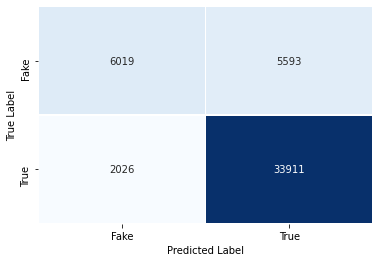

In [ ]:
pred_bt_SVM = model_bt_SVM.predict(X_valid_bt_scaling_standard)
pred_prob_bt_SVM = model_bt_SVM.predict_proba(X_valid_bt_scaling_standard)
acc_bt_SVM = c_report(y_valid,pred_bt_SVM)
plot_cm(y_valid,pred_bt_SVM)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bt_SVM[:, 1]))

##BoW + Word2Vec + SVM

In [ ]:
model_bw_SVM = svm.SVC(kernel='linear', probability=True,random_state=42)
model_bw_SVM.fit(X_train_bw_scaling_standard, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.75      0.52      0.61     11612
        True       0.86      0.94      0.90     35937

    accuracy                           0.84     47549
   macro avg       0.80      0.73      0.76     47549
weighted avg       0.83      0.84      0.83     47549

Accuracy : 0.8397652947485752
ROC AUC 0.8316993846764275


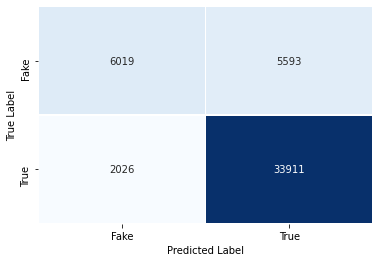

In [ ]:
pred_bw_SVM = model_bw_SVM.predict(X_valid_bw_scaling_standard)
pred_prob_bw_SVM = model_bw_SVM.predict_proba(X_valid_bw_scaling_standard)
acc_bw_SVM = c_report(y_valid,pred_bw_SVM)
plot_cm(y_valid,pred_bw_SVM)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bw_SVM[:, 1]))

##TF-idf + Word2Vec + SVM

In [ ]:
model_tw_SVM = svm.SVC(kernel='linear', probability=True,random_state=42)
model_tw_SVM.fit(X_train_tw_scaling_standard, y_train)

In [ ]:
pred_tw_SVM = model_tw_SVM.predict(X_valid_tw_scaling_standard)
pred_prob_tw_SVM = model_tw_SVM.predict_proba(X_valid_tw_scaling_standard)
acc_tw_SVM = c_report(y_valid,pred_tw_SVM)
plot_cm(y_valid,pred_tw_SVM)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_tw_SVM[:, 1]))

##BoW + TF-idf + Word2Vec + SVM

In [ ]:
model_btw_SVM = svm.SVC(kernel='linear', probability=True,random_state=42)
model_btw_SVM.fit(X_train_btw_scaling_standard, y_train)

In [ ]:
pred_btw_SVM = model_btw_SVM.predict(X_valid_btw_scaling_standard)
pred_prob_btw_SVM = model_btw_SVM.predict_proba(X_valid_btw_scaling_standard)
acc_btw_SVM = c_report(y_valid,pred_btw_SVM)
plot_cm(y_valid,pred_btw_SVM)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_btw_SVM[:, 1]))

## --

## BoW + TF-idf + Multinomial Naive Bayes

In [ ]:
model_bt_NB = MultinomialNB(alpha=0.7)
model_bt_NB.fit(X_train_bt_scaling_min_max,y_train)
pred_bt_NB = model_bt_NB.predict(X_valid_bt_scaling_min_max)
pred_prob_bt_NB = model_bt_NB.predict_proba(X_valid_bt_scaling_min_max)

Classifictaion Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00     11612
        True       0.76      1.00      0.86     35937

    accuracy                           0.76     47549
   macro avg       0.38      0.50      0.43     47549
weighted avg       0.57      0.76      0.65     47549

Accuracy : 0.7557887652737176
ROC AUC 0.8617326908475562


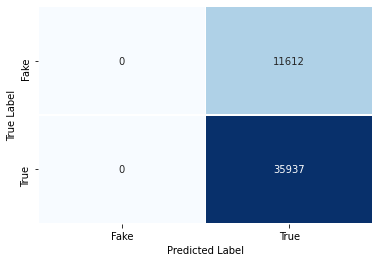

In [ ]:
acc_bt_NB = c_report(y_valid,pred_bt_NB)
plot_cm(y_valid,pred_bt_NB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bt_NB[:, 1]))

## BoW + Word2Vec + Multinomial Naive Bayes

In [ ]:
model_bw_NB = MultinomialNB(alpha=0.7)
model_bw_NB.fit(X_train_bw_scaling_min_max,y_train)
pred_bw_NB = model_bw_NB.predict(X_valid_bw_scaling_min_max)
pred_prob_bw_NB = model_bw_NB.predict_proba(X_valid_bw_scaling_min_max)

Classifictaion Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00     11612
        True       0.76      1.00      0.86     35937

    accuracy                           0.76     47549
   macro avg       0.38      0.50      0.43     47549
weighted avg       0.57      0.76      0.65     47549

Accuracy : 0.7557887652737176
ROC AUC 0.6861254070460563


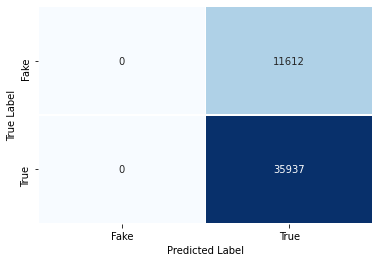

In [ ]:
acc_bw_NB = c_report(y_valid,pred_bw_NB)
plot_cm(y_valid,pred_bw_NB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bw_NB[:, 1]))

## TF-idf + Word2Vec + Multinomial Naive Bayes

In [ ]:
model_tw_NB = MultinomialNB(alpha=0.7)
model_tw_NB.fit(X_train_tw_scaling_min_max,y_train)
pred_tw_NB = model_tw_NB.predict(X_valid_tw_scaling_min_max)
pred_prob_tw_NB = model_tw_NB.predict_proba(X_valid_tw_scaling_min_max)

Classifictaion Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00     11612
        True       0.76      1.00      0.86     35937

    accuracy                           0.76     47549
   macro avg       0.38      0.50      0.43     47549
weighted avg       0.57      0.76      0.65     47549

Accuracy : 0.7557887652737176
ROC AUC 0.7597002281166995


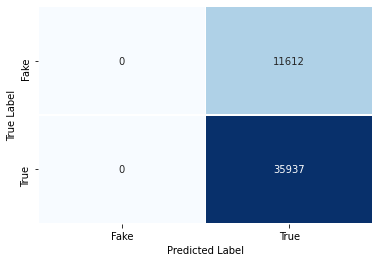

In [ ]:
acc_tw_NB = c_report(y_valid,pred_tw_NB)
plot_cm(y_valid,pred_tw_NB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_tw_NB[:, 1]))

## BoW + TF-idf + Word2Vec + Multinomial Naive Bayes

In [ ]:
model_btw_NB = MultinomialNB(alpha=0.7)
model_btw_NB.fit(X_train_btw_scaling_min_max,y_train)
pred_btw_NB = model_btw_NB.predict(X_valid_btw_scaling_min_max)
pred_prob_btw_NB = model_btw_NB.predict_proba(X_valid_btw_scaling_min_max)

Classifictaion Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00     11612
        True       0.76      1.00      0.86     35937

    accuracy                           0.76     47549
   macro avg       0.38      0.50      0.43     47549
weighted avg       0.57      0.76      0.65     47549

Accuracy : 0.7557887652737176
ROC AUC 0.809717942691669


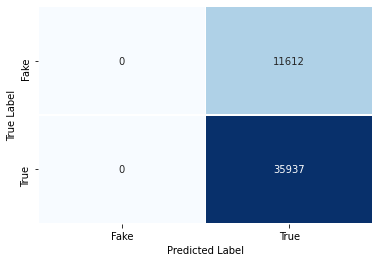

In [ ]:
acc_btw_NB = c_report(y_valid,pred_btw_NB)
plot_cm(y_valid,pred_btw_NB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_btw_NB[:, 1]))

## --

## BoW + TF-idf + Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_bt_GB = GaussianNB()
model_bt_GB.fit(X_train_bt_scaling_standard, y_train)
pred_bt_GB = model_bt_GB.predict(X_valid_bt_scaling_standard)
pred_prob_bt_GB = model_bt_GB.predict_proba(X_valid_bt_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.69      0.43      0.53     11612
        True       0.84      0.94      0.88     35937

    accuracy                           0.81     47549
   macro avg       0.76      0.68      0.71     47549
weighted avg       0.80      0.81      0.80     47549

Accuracy : 0.8135817787966099
ROC AUC 0.861284905558356


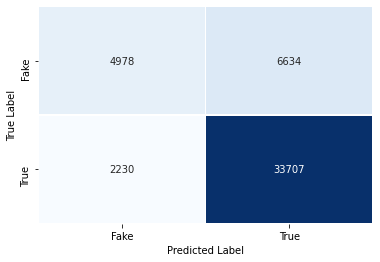

In [ ]:
acc_bt_GB = c_report(y_valid,pred_bt_GB)
plot_cm(y_valid,pred_bt_GB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bt_GB[:, 1]))

## BoW + Word2Vec + Gaussian Naive Bayes

In [ ]:
model_bw_GB = GaussianNB()
model_bw_GB.fit(X_train_bw_scaling_standard, y_train)
pred_bw_GB = model_bw_GB.predict(X_valid_bw_scaling_standard)
pred_prob_bw_GB = model_bw_GB.predict_proba(X_valid_bw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.78      0.33      0.47     11612
        True       0.82      0.97      0.89     35937

    accuracy                           0.81     47549
   macro avg       0.80      0.65      0.68     47549
weighted avg       0.81      0.81      0.79     47549

Accuracy : 0.8147805421775431
ROC AUC 0.809951441125234


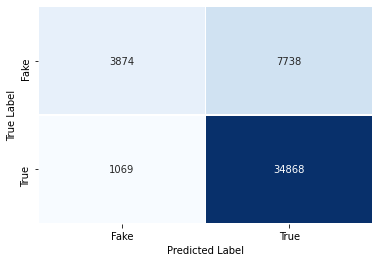

In [ ]:
acc_bw_GB = c_report(y_valid,pred_bw_GB)
plot_cm(y_valid,pred_bw_GB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bw_GB[:, 1]))

## TF-idf + Word2Vec + Gaussian Naive Bayes

In [ ]:
model_tw_GB = GaussianNB()
model_tw_GB.fit(X_train_tw_scaling_standard, y_train)
pred_tw_GB = model_tw_GB.predict(X_valid_tw_scaling_standard)
pred_prob_tw_GB = model_tw_GB.predict_proba(X_valid_tw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.76      0.34      0.47     11612
        True       0.82      0.97      0.89     35937

    accuracy                           0.81     47549
   macro avg       0.79      0.65      0.68     47549
weighted avg       0.81      0.81      0.78     47549

Accuracy : 0.812887757891859
ROC AUC 0.8271403936009232


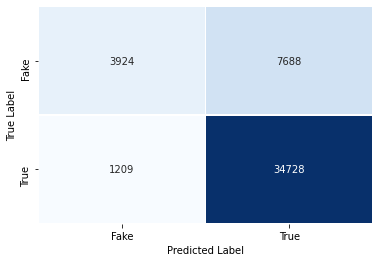

In [ ]:
acc_tw_GB = c_report(y_valid,pred_tw_GB)
plot_cm(y_valid,pred_tw_GB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_tw_GB[:, 1]))

## BoW + TF-idf + Word2Vec + Gaussian Naive Bayes

In [ ]:
model_btw_GB = GaussianNB()
model_btw_GB.fit(X_train_btw_scaling_standard, y_train)
pred_btw_GB = model_btw_GB.predict(X_valid_btw_scaling_standard)
pred_prob_btw_GB = model_btw_GB.predict_proba(X_valid_btw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.71      0.38      0.49     11612
        True       0.83      0.95      0.88     35937

    accuracy                           0.81     47549
   macro avg       0.77      0.66      0.69     47549
weighted avg       0.80      0.81      0.79     47549

Accuracy : 0.8104902311299922
ROC AUC 0.816053102498017


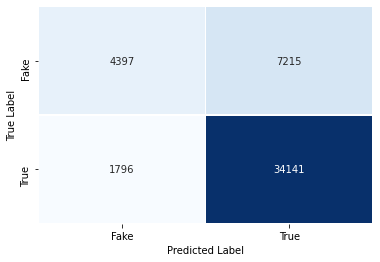

In [ ]:
acc_btw_GB = c_report(y_valid,pred_btw_GB)
plot_cm(y_valid,pred_btw_GB)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_btw_GB[:, 1]))

## --

##BoW + TF-idf + Dicision Tree

In [ ]:
from sklearn import tree
clf_bt = tree.DecisionTreeClassifier()
clf_bt.fit(X_train_bt_scaling_standard, y_train)
pred_bt_DT = clf_bt.predict(X_valid_bt_scaling_standard)
pred_prob_bt_DT = clf_bt.predict_proba(X_valid_bt_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.55      0.66      0.60     11612
        True       0.88      0.83      0.85     35937

    accuracy                           0.79     47549
   macro avg       0.72      0.75      0.73     47549
weighted avg       0.80      0.79      0.79     47549

Accuracy : 0.7870407369240152
ROC AUC 0.7674231075105207


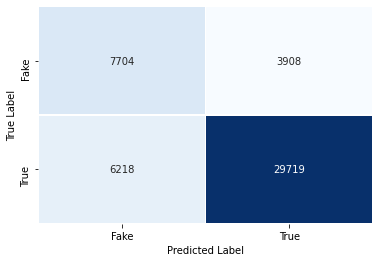

In [ ]:
acc_bt_DT = c_report(y_valid,pred_bt_DT)
plot_cm(y_valid,pred_bt_DT)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bt_DT[:, 1]))

##BoW + Word2Vec + Dicision Tree

In [ ]:
clf_bw = tree.DecisionTreeClassifier()
clf_bw.fit(X_train_bw_scaling_standard, y_train)
pred_bw_DT = clf_bw.predict(X_valid_bw_scaling_standard)
pred_prob_bw_DT = clf_bw.predict_proba(X_valid_bw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.29      0.12      0.18     11612
        True       0.76      0.90      0.83     35937

    accuracy                           0.71     47549
   macro avg       0.53      0.51      0.50     47549
weighted avg       0.65      0.71      0.67     47549

Accuracy : 0.7133062735283602
ROC AUC 0.5132369101912577


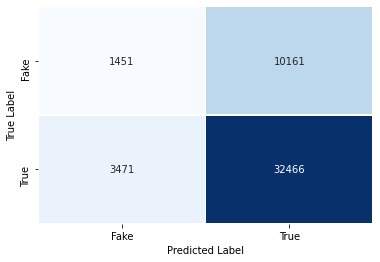

In [ ]:
acc_bw_DT = c_report(y_valid,pred_bw_DT)
plot_cm(y_valid,pred_bw_DT)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bw_DT[:, 1]))

##TF-idf + Word2Vec + Dicision Tree

In [ ]:
clf_tw = tree.DecisionTreeClassifier()
clf_tw.fit(X_train_tw_scaling_standard, y_train)
pred_tw_DT = clf_tw.predict(X_valid_tw_scaling_standard)
pred_prob_tw_DT = clf_tw.predict_proba(X_valid_tw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.38      0.20      0.26     11612
        True       0.78      0.90      0.83     35937

    accuracy                           0.73     47549
   macro avg       0.58      0.55      0.55     47549
weighted avg       0.68      0.73      0.69     47549

Accuracy : 0.725756587940861
ROC AUC 0.5460653248190649


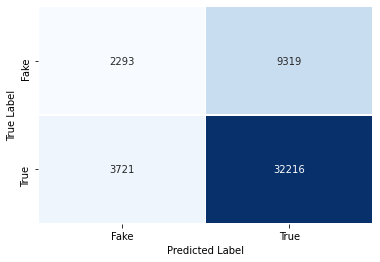

In [ ]:
acc_tw_DT = c_report(y_valid,pred_tw_DT)
plot_cm(y_valid,pred_tw_DT)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_tw_DT[:, 1]))

##BoW + TF-idf + Word2Vec + Dicision Tree

In [ ]:
clf_btw = tree.DecisionTreeClassifier()
clf_btw.fit(X_train_btw_scaling_standard, y_train)
pred_btw_DT = clf_btw.predict(X_valid_btw_scaling_standard)
pred_prob_btw_DT = clf_btw.predict_proba(X_valid_btw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.46      0.32      0.38     11612
        True       0.80      0.88      0.84     35937

    accuracy                           0.74     47549
   macro avg       0.63      0.60      0.61     47549
weighted avg       0.72      0.74      0.72     47549

Accuracy : 0.7412774190834718
ROC AUC 0.5941794648557814


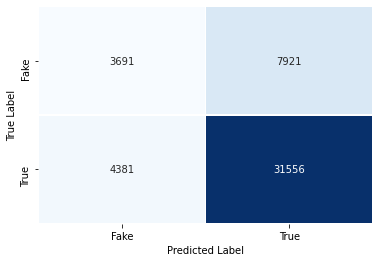

In [ ]:
acc_btw_DT = c_report(y_valid,pred_btw_DT)
plot_cm(y_valid,pred_btw_DT)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_btw_DT[:, 1]))

## --

##BoW + Tf-idf + KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_bt_KNN=KNeighborsClassifier(n_neighbors=3)
model_bt_KNN.fit(X_train_bt_scaling_standard,y_train)
pred_bt_KNN = model_bt_KNN.predict(X_valid_bt_scaling_standard)
pred_prob_bt_KNN = model_bt_KNN.predict_proba(X_valid_bt_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.63      0.67      0.65     11612
        True       0.89      0.87      0.88     35937

    accuracy                           0.82     47549
   macro avg       0.76      0.77      0.77     47549
weighted avg       0.83      0.82      0.82     47549

Accuracy : 0.8220151843361585
ROC AUC 0.8093043593790186


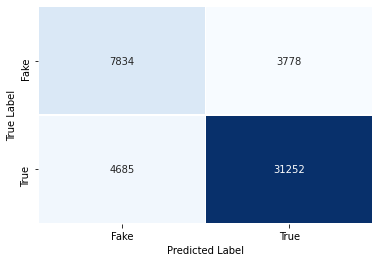

In [ ]:
acc_bt_KNN = c_report(y_valid,pred_bt_KNN)
plot_cm(y_valid,pred_bt_KNN)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bt_KNN[:, 1]))

##BoW + Word2Vec + KNeighborsClassifier

In [ ]:
model_bw_KNN=KNeighborsClassifier(n_neighbors=3)
model_bw_KNN.fit(X_train_bw_scaling_standard,y_train)
pred_bw_KNN = model_bw_KNN.predict(X_valid_bw_scaling_standard)
pred_prob_bw_KNN = model_bw_KNN.predict_proba(X_valid_bw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.37      0.10      0.16     11612
        True       0.76      0.94      0.84     35937

    accuracy                           0.74     47549
   macro avg       0.57      0.52      0.50     47549
weighted avg       0.67      0.74      0.68     47549

Accuracy : 0.7382699951628846
ROC AUC 0.5927227098756693


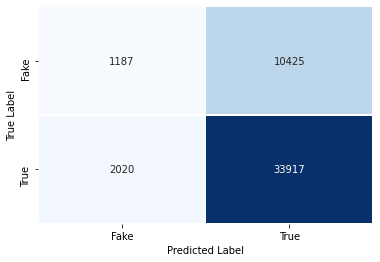

In [ ]:
acc_bw_KNN = c_report(y_valid,pred_bw_KNN)
plot_cm(y_valid,pred_bw_KNN)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_bw_KNN[:, 1]))

##TF-idf + Word2Vec + KNeighborsClassifier

In [ ]:
model_tw_KNN=KNeighborsClassifier(n_neighbors=3)
model_tw_KNN.fit(X_train_tw_scaling_standard,y_train)
pred_tw_KNN = model_tw_KNN.predict(X_valid_tw_scaling_standard)
pred_prob_tw_KNN = model_tw_KNN.predict_proba(X_valid_tw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.35      0.11      0.17     11612
        True       0.76      0.94      0.84     35937

    accuracy                           0.73     47549
   macro avg       0.56      0.52      0.50     47549
weighted avg       0.66      0.73      0.68     47549

Accuracy : 0.733853498496288
ROC AUC 0.6155980845301954


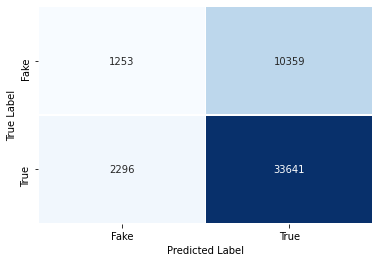

In [ ]:
acc_tw_KNN = c_report(y_valid,pred_tw_KNN)
plot_cm(y_valid,pred_tw_KNN)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_tw_KNN[:, 1]))

##BoW + TF-idf + Word2Vec + KNeighborsClassifier

In [ ]:
model_btw_KNN=KNeighborsClassifier(n_neighbors=3)
model_btw_KNN.fit(X_train_btw_scaling_standard,y_train)
pred_btw_KNN = model_btw_KNN.predict(X_valid_btw_scaling_standard)
pred_prob_btw_KNN = model_btw_KNN.predict_proba(X_valid_btw_scaling_standard)

Classifictaion Report
              precision    recall  f1-score   support

        Fake       0.35      0.10      0.16     11612
        True       0.76      0.94      0.84     35937

    accuracy                           0.73     47549
   macro avg       0.56      0.52      0.50     47549
weighted avg       0.66      0.73      0.68     47549

Accuracy : 0.7344844265915161
ROC AUC 0.6095798546526348


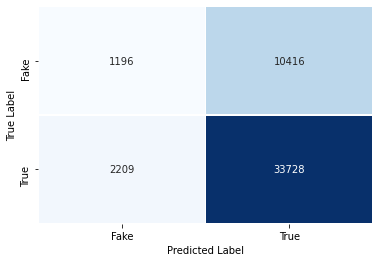

In [ ]:
acc_btw_KNN = c_report(y_valid,pred_btw_KNN)
plot_cm(y_valid,pred_btw_KNN)
print('ROC AUC', roc_auc_score(y_valid,pred_prob_btw_KNN[:, 1]))